In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Goal 1: Reading data from a CSV file

In [4]:
# Import data
rawData = pd.read_csv("MajorPowerStations_v2.csv")
print(rawData.shape)
rawData.head()

(489, 20)


,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,OWNER,GENERATIONTYPE,PRIMARYFUELTYPE,PRIMARYSUBFUELTYPE,GENERATIONMW,GENERATORNUMBER,SUBURB,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,LATITUDE,LONGITUDE
0,1,Power Station,A facility used for the generation of electric...,Renewable,120.0,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,28.0,1,Ouse,Tasmania,5,20171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,143.0,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,432.0,3,Southwest,Tasmania,3,20171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,134.0,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,144.0,1,Queenstown,Tasmania,4,20171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,128.0,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,82.8,1,West Coast,Tasmania,2,20171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,137.0,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,79.9,1,Tullah,Tasmania,5,20171211,Hydro,-41.735983,145.532112


1.1 Visualise the 9th, 23rd, 31st and 4th last records

In [5]:
idxLs = np.append(np.array([9,23,31])-1, -4)
rawData.iloc[idxLs]

,OBJECTID,FEATURETYPE,DESCRIPTION,CLASS,FID,NAME,OPERATIONALSTATUS,OWNER,GENERATIONTYPE,PRIMARYFUELTYPE,PRIMARYSUBFUELTYPE,GENERATIONMW,GENERATORNUMBER,SUBURB,STATE,SPATIALCONFIDENCE,REVISED,COMMENT,LATITUDE,LONGITUDE
8,9,Power Station,A facility used for the generation of electric...,Renewable,140.0,Wilmot,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,81.6,1,Cethana,Tasmania,5,20171211,NaN,-41.483312,146.125073
22,23,Power Station,A facility used for the generation of electric...,Renewable,17.0,Shepparton Biogas Generation Plant,Operational,Diamond Energy Pty Ltd,Spark Ignition Reciprocating Engine,Biogas,Sewage Methane,1.1,NaN,Shepparton North,Victoria,4,20171211,Biomass,-36.321775,145.378983
30,31,Power Station,A facility used for the generation of electric...,Renewable,71.0,Springvale,Operational,Energy Developments LFG (Victoria) Pty Ltd,Spark Ignition Reciprocating Engine,Biogas,Landfill Methane,4.2,6,South,Victoria,4,20171211,Landfill Gas,-37.973297,145.139635
485,486,Power Station,A facility used for the generation of electric...,Renewable,489.0,Moree,Operational,FRV,Solar Photovoltaic,Solar,Photovoltaic,60.0,<Null>,Moree,New South Wales,3,20180111,NaN,-29.572176,149.866918


1.2 Rename dataframe columns

In [6]:
#Let's see the current axis titles
rawData.axes

[RangeIndex(start=0, stop=489, step=1),
 Index(['OBJECTID', 'FEATURETYPE', 'DESCRIPTION', 'CLASS', 'FID', 'NAME',
        'OPERATIONALSTATUS', 'OWNER', 'GENERATIONTYPE', 'PRIMARYFUELTYPE',
        'PRIMARYSUBFUELTYPE', 'GENERATIONMW', 'GENERATORNUMBER', 'SUBURB',
        'STATE', 'SPATIALCONFIDENCE', 'REVISED', 'COMMENT', 'LATITUDE',
        'LONGITUDE'],
       dtype='object')]

In [7]:
#Let's first check the current names of the columns as read from the CSV's header line
rawData.columns.values.tolist()

['OBJECTID',
 'FEATURETYPE',
 'DESCRIPTION',
 'CLASS',
 'FID',
 'NAME',
 'OPERATIONALSTATUS',
 'OWNER',
 'GENERATIONTYPE',
 'PRIMARYFUELTYPE',
 'PRIMARYSUBFUELTYPE',
 'GENERATIONMW',
 'GENERATORNUMBER',
 'SUBURB',
 'STATE',
 'SPATIALCONFIDENCE',
 'REVISED',
 'COMMENT',
 'LATITUDE',
 'LONGITUDE']

In [10]:
#Create a working copy of the raw data
wrkData = rawData.copy()

In [11]:
#Rename columns
wrkData.rename(columns = {
'OBJECTID': 'oid',
 'CLASS' : 'class',
 'FID' : 'fid',
 'NAME' : 'name',
 'OPERATIONALSTATUS' : 'status',
 'OWNER' : 'owner',
 'GENERATIONTYPE' : 'type',
 'PRIMARYFUELTYPE' : 'fueltype',
 'PRIMARYSUBFUELTYPE' : 'fuelsubtype',
 'GENERATIONMW' : 'power',
 'GENERATORNUMBER' : 'numGen',
 'SUBURB' : 'suburb',
 'STATE' : 'state',
 'SPATIALCONFIDENCE' : 'spConf',
 'REVISED' : 'revised',
 'COMMENT' : 'comment',
 'LATITUDE' : 'lat',
 'LONGITUDE' : 'long'
    
    
    
}, inplace = True)

In [12]:
#Convert to datetime
wrkData['revised'] = pd.to_datetime(wrkData['revised'])

In [13]:
#Check df column data types
print(wrkData.dtypes)

oid                     int64
FEATURETYPE            object
DESCRIPTION            object
class                  object
fid                   float64
name                   object
status                 object
owner                  object
type                   object
fueltype               object
fuelsubtype            object
power                 float64
numGen                 object
suburb                 object
state                  object
spConf                  int64
revised        datetime64[ns]
comment                object
lat                   float64
long                  float64
dtype: object


In [14]:
#view
wrkData.head()
# the timestamp doesnt work

,oid,FEATURETYPE,DESCRIPTION,class,fid,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
0,1,Power Station,A facility used for the generation of electric...,Renewable,120.0,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,28.0,1,Ouse,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,143.0,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,432.0,3,Southwest,Tasmania,3,1970-01-01 00:00:00.020171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,134.0,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,144.0,1,Queenstown,Tasmania,4,1970-01-01 00:00:00.020171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,128.0,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,82.8,1,West Coast,Tasmania,2,1970-01-01 00:00:00.020171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,137.0,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,79.9,1,Tullah,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-41.735983,145.532112


In [16]:
# Can also drop(REMOVE) some columns which we do not need
wrkData.drop(['fid'], axis = 1, inplace = True) 
wrkData.head()

,oid,FEATURETYPE,DESCRIPTION,class,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
0,1,Power Station,A facility used for the generation of electric...,Renewable,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,28.0,1,Ouse,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,432.0,3,Southwest,Tasmania,3,1970-01-01 00:00:00.020171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,144.0,1,Queenstown,Tasmania,4,1970-01-01 00:00:00.020171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,82.8,1,West Coast,Tasmania,2,1970-01-01 00:00:00.020171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,79.9,1,Tullah,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-41.735983,145.532112


In [17]:
wrkData['name'].count()

489

2. Data Cleaning and Conversion

In [18]:
# Check what we have read in so far
wrkData

,oid,FEATURETYPE,DESCRIPTION,class,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
0,1,Power Station,A facility used for the generation of electric...,Renewable,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,28.0,1,Ouse,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,432.0,3,Southwest,Tasmania,3,1970-01-01 00:00:00.020171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,144.0,1,Queenstown,Tasmania,4,1970-01-01 00:00:00.020171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,82.8,1,West Coast,Tasmania,2,1970-01-01 00:00:00.020171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,NaN,79.9,1,Tullah,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-41.735983,145.532112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,485,Power Station,A facility used for the generation of electric...,Non Renewable,Roy Hill,Operational,Alinta Energy,Spark Ignition Reciprocating Engine,Distillate,NaN,6.0,NaN,Newman,Western Australia,5,1970-01-01 00:00:00.020171105,NaN,-22.481238,119.947187
485,486,Power Station,A facility used for the generation of electric...,Renewable,Moree,Operational,FRV,Solar Photovoltaic,Solar,Photovoltaic,60.0,<Null>,Moree,New South Wales,3,1970-01-01 00:00:00.020180111,NaN,-29.572176,149.866918
486,487,Power Station,A facility used for the generation of electric...,Renewable,Gullen Range Wind Farm,Operational,Tianrun Australia,Wind Turbine,Wind,NaN,165.5,73,Bannister,New South Wales,3,1970-01-01 00:00:00.020171211,NaN,-34.614917,149.459743
487,488,Power Station,A facility used for the generation of electric...,Renewable,Mortons Lane Wind Farm,Operational,China Guangdong Nuclear Wind Energy Company,Wind Turbine,Wind,NaN,20.0,13,Nareeb,Victoria,3,1970-01-01 00:00:00.020171211,NaN,-37.841342,142.465313


In [20]:
# Check the names of owners again as done before in Refine
wrkData['owner'].unique()

# The same but alphabetically sorted
wrkData.sort_values(by=['owner'])['owner'].unique()

array(['AGL', 'AGL Energy', 'AGL Energy Pty Ltd',
       'ANZ Energy Infrastructure Trust', 'APA Group and AGL Energy Ltd',
       'ATCO Power', 'ATCO and Origin Energy', 'Acciona Energy Australia',
       'Adelaide Airport Ltd', 'Adelaide Showgrounds',
       'Alcoa of Australia Ltd', 'Alice Springs Airport', 'Alinta DEBO',
       'Alinta Energy', 'AnaeCo Ltd', 'Ananga Pitjantjatjara Council',
       'Apex Minerals', 'Arrow Energy', 'Atlantic Ltd',
       'Aurora Energy (Tamar Valley)',
       'Aurora Energy Tamar Valley Pty Ltd', 'Ausgrid',
       'Australian Paper', 'BHP', 'BHP Billiton',
       'Ballarat Base Hospital', 'Bango Wind Farm Pty Ltd',
       'Bankstown Sports Club', 'Barrick Gold',
       'Barrick Gold of Australia', 'Biogreen Energy Pty Limited',
       'Boco Rock Wind Farm Pty Ltd', 'Burns and Roe Worley', 'COFCO',
       'CS Energy', 'CSIRO', 'CSR', 'Capral Ltd',
       'Carter Holt Harvey Wood Products Australia Pty Limited',
       'Central Energy Power', 'Central 

In [21]:
# Potential fix for AGL Energy
wrkData['owner'].replace(to_replace = "AGL", value = "AGL Energy Pty Ltd", inplace = True)
wrkData['owner'].replace(to_replace = "AGL Energy", value = "AGL Energy Pty Ltd", inplace = True)
wrkData.sort_values(by=['owner'])['owner'].unique()

array(['AGL Energy Pty Ltd', 'ANZ Energy Infrastructure Trust',
       'APA Group and AGL Energy Ltd', 'ATCO Power',
       'ATCO and Origin Energy', 'Acciona Energy Australia',
       'Adelaide Airport Ltd', 'Adelaide Showgrounds',
       'Alcoa of Australia Ltd', 'Alice Springs Airport', 'Alinta DEBO',
       'Alinta Energy', 'AnaeCo Ltd', 'Ananga Pitjantjatjara Council',
       'Apex Minerals', 'Arrow Energy', 'Atlantic Ltd',
       'Aurora Energy (Tamar Valley)',
       'Aurora Energy Tamar Valley Pty Ltd', 'Ausgrid',
       'Australian Paper', 'BHP', 'BHP Billiton',
       'Ballarat Base Hospital', 'Bango Wind Farm Pty Ltd',
       'Bankstown Sports Club', 'Barrick Gold',
       'Barrick Gold of Australia', 'Biogreen Energy Pty Limited',
       'Boco Rock Wind Farm Pty Ltd', 'Burns and Roe Worley', 'COFCO',
       'CS Energy', 'CSIRO', 'CSR', 'Capral Ltd',
       'Carter Holt Harvey Wood Products Australia Pty Limited',
       'Central Energy Power', 'Central Victoria Solar City C

In [22]:
# Replace NaN values which we generated by read_csv()
wrkData['numGen'].fillna(0, inplace = True)
wrkData['fuelsubtype'].fillna('', inplace = True)
wrkData

,oid,FEATURETYPE,DESCRIPTION,class,name,status,owner,type,fueltype,fuelsubtype,power,numGen,suburb,state,spConf,revised,comment,lat,long
0,1,Power Station,A facility used for the generation of electric...,Renewable,Repulse,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,28.0,1,Ouse,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-42.507695,146.646960
1,2,Power Station,A facility used for the generation of electric...,Renewable,Gordon,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,432.0,3,Southwest,Tasmania,3,1970-01-01 00:00:00.020171211,Hydro-Underground,-42.740518,145.982832
2,3,Power Station,A facility used for the generation of electric...,Renewable,John Butters,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,144.0,1,Queenstown,Tasmania,4,1970-01-01 00:00:00.020171211,Hydro,-42.154835,145.534477
3,4,Power Station,A facility used for the generation of electric...,Renewable,Tribute,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,82.8,1,West Coast,Tasmania,2,1970-01-01 00:00:00.020171211,Hydro-Underground,-41.812870,145.653820
4,5,Power Station,A facility used for the generation of electric...,Renewable,Bastyan,Operational,Hydro-Electric Corporation (Tasmania),Hydroelectric (Gravity),Water,,79.9,1,Tullah,Tasmania,5,1970-01-01 00:00:00.020171211,Hydro,-41.735983,145.532112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,485,Power Station,A facility used for the generation of electric...,Non Renewable,Roy Hill,Operational,Alinta Energy,Spark Ignition Reciprocating Engine,Distillate,,6.0,0,Newman,Western Australia,5,1970-01-01 00:00:00.020171105,NaN,-22.481238,119.947187
485,486,Power Station,A facility used for the generation of electric...,Renewable,Moree,Operational,FRV,Solar Photovoltaic,Solar,Photovoltaic,60.0,<Null>,Moree,New South Wales,3,1970-01-01 00:00:00.020180111,NaN,-29.572176,149.866918
486,487,Power Station,A facility used for the generation of electric...,Renewable,Gullen Range Wind Farm,Operational,Tianrun Australia,Wind Turbine,Wind,,165.5,73,Bannister,New South Wales,3,1970-01-01 00:00:00.020171211,NaN,-34.614917,149.459743
487,488,Power Station,A facility used for the generation of electric...,Renewable,Mortons Lane Wind Farm,Operational,China Guangdong Nuclear Wind Energy Company,Wind Turbine,Wind,,20.0,13,Nareeb,Victoria,3,1970-01-01 00:00:00.020171211,NaN,-37.841342,142.465313


In [26]:
# Changing the data type THIS WILL FAIL BECAUSE OF NULL VALUES (STATED IN VALUE ERROR)

wrkData['numGen'] = wrkData['numGen'].astype(int)
wrkData['power'] = wrkData['power'].astype(float)

In [27]:
#Option 1: Fix the read_csv() call and pass missing values list including "<Null>"
#missing_values = ["<Null>"]
#rawData = pd.read_csv('...', na_values = missing_values)

#Option 2: Replace <Null> value in current numGen column
wrkData['numGen'].replace(to_replace = '<Null>', value = 0, inplace = True)

In [28]:
# Changing the data type THIS WILL WORK AFTER REPLACING NULL
wrkData['numGen'] = wrkData['numGen'].astype(int)
wrkData['power'] = wrkData['power'].astype(float)

In [31]:
#Check df columns of data types
print(wrkData.dtypes)

oid                     int64
FEATURETYPE            object
DESCRIPTION            object
class                  object
name                   object
status                 object
owner                  object
type                   object
fueltype               object
fuelsubtype            object
power                 float64
numGen                  int32
suburb                 object
state                  object
spConf                  int64
revised        datetime64[ns]
comment                object
lat                   float64
long                  float64
dtype: object


3. Data Exploration and Descriptive Stats

In [33]:
wrkData['status'].unique()

array(['Operational', 'Non-Operational', 'Decommissioned', 'Proposed'],
      dtype=object)

In [35]:
wrkData['type'].unique()

array(['Hydroelectric (Gravity)', 'Open Cycle Gas Turbine',
       'Wind Turbine', 'Spark Ignition Reciprocating Engine',
       'Steam Subcritical', 'Combined Cycle Gas Turbine',
       'Compression Reciprocating Engine', 'Gas Turbine', 'Cogeneration',
       'Open Cycle', nan, 'Steam Turbine',
       'Cogeneration - Steam Subcritical',
       'Hydroelectric (Pumped Storage)',
       'Cogeneration - Spark Ignition Reciprocat',
       'Hydroelectric (Run of River)', 'Steam Super Critical',
       'Reciprocating Engine', 'Solar Photovoltaic',
       'Reciprocating Engines', 'Solar Thermal', 'Combined Cycle',
       '<Null>', 'Steam Sub-Critical'], dtype=object)

In [36]:
wrkData['fueltype'].unique()

array(['Water', 'Natural Gas', 'Wind', 'Biogas', 'Coal', 'Distillate',
       'Gas', 'Biomass', 'Fuel Oil', 'Compressed Natural Gas',
       'Coal Seam Methane', 'Solar', 'Diesel'], dtype=object)

In [37]:
wrkData['power'].min()

0.01

In [38]:
wrkData['power'].max()

2880.0

In [39]:
wrkData['power'].mean()

135.63645398773014

In [40]:
wrkData['power'].median()

27.0

In [43]:
#which is the most frequent class of power station?
wrkData['class'].mode()

0    Renewable
dtype: object

In [44]:
#What is the frequency distribution of the power station class?
classDistr = wrkData.groupby('class').size()
print(classDistr)

class
Non Renewable    229
Renewable        260
dtype: int64


4. Data Visualisations

(a) Frequency Plot / Histogram
Produce a bar chart of which primary fuel types are used.


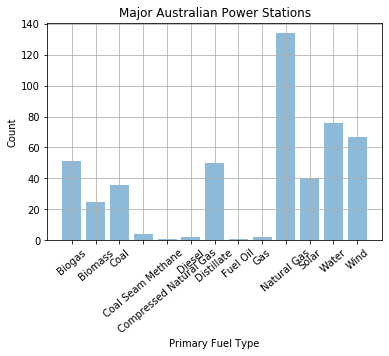

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

fuelTypeDistr = wrkData.groupby('fueltype').size().reset_index(name='numStations')

#Plot
plt.bar(fuelTypeDistr['fueltype'], fuelTypeDistr['numStations'], alpha = 0.5, align = 'center')
plt.xticks(rotation = 40)
plt.title('Major Australian Power Stations')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.grid()

(b) Histogram with Binning

Plot the number of generators per power station in bins of 10.

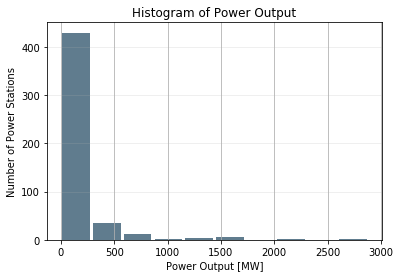

In [48]:
pyExpFreq = wrkData['power'].hist(bins=10, rwidth = 0.9, color = '#607c8e')
plt.title("Histogram of Power Output")
plt.xlabel('Power Output [MW]')
plt.ylabel('Number of Power Stations')
plt.grid(axis='y', alpha = 0.25)

(c) Scatter Plot for comparing power and size

Text(0, 0.5, 'Output [MW]')

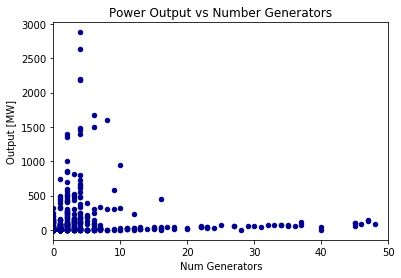

In [49]:
%matplotlib inline

fig = plt.figure()
sub = plt.subplot()
wrkData.plot.scatter(x = 'numGen', y = 'power', c = 'DarkBlue', ax = sub)
sub.set_xlim(0, 50)
plt.title("Power Output vs Number Generators")
plt.xlabel('Num Generators')
plt.ylabel('Output [MW]')


Next we want to color code the data points in the scatter plot by station. To be able to give power per point, we need to create a numeric encoding of the fuel type.

In [50]:
wrkData['fueltype'].unique()

array(['Water', 'Natural Gas', 'Wind', 'Biogas', 'Coal', 'Distillate',
       'Gas', 'Biomass', 'Fuel Oil', 'Compressed Natural Gas',
       'Coal Seam Methane', 'Solar', 'Diesel'], dtype=object)

In [51]:
wrkData['fuelEncoding'] = wrkData['fueltype'].map({
    'Solar' : 1,
    'Water' : 2,
    'Wind' : 3,
    'Biogas' : 4,
    'Natural Gas' : 5,
    'Compressed Natural Gas' : 6,
    'Coal Seam Methane' : 7,
    'Gas' : 8,
    'Coal' : 9
})

Text(0, 0.5, 'Output [MW]')

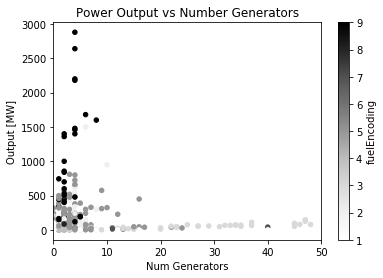

In [52]:
# Now we can use this encoding column to color our plot

%matplotlib inline

fig = plt.figure()
sub = plt.subplot()
wrkData.plot.scatter(x = 'numGen', y = 'power', c = 'fuelEncoding', ax = sub)
sub.set_xlim(0, 50)
plt.title("Power Output vs Number Generators")
plt.xlabel('Num Generators')
plt.ylabel('Output [MW]')